<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h1 class="list-group-item list-group-item-action active" data-toggle="list" style='background:#005097; border:0' role="tab" aria-controls="home"><center>APRENDIZADO DE MÁQUINA (CIC1205/GCC1932) - Trabalho 1</center></h1>

- Nome completo: <NOME_COMPLETO>
- [Link para vídeo](<LINK_VIDEO>)

# (1) Predição de pagamento de empréstimos

Esse conjunto de dados contém diversos atributos que são categóricos. Modelos de AM
não podem ser treinados no Scikit-Learn sobre atributos cujos valores são cadeias de
caracteres. Sendo assim, você deve tomar providências para codificar numericamente
esses atributos de maneira apropriada.

In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

path = 'C:/Users/parai/Documents/Github - Aprendizado de Máquina/Machine-Learning/data/'
train = 'credtrain.txt'
test = 'credtest.txt'

nomes_colunas = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPARC', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

credtrain = pd.read_csv(f'{path}/{train}', names=nomes_colunas, delimiter='\t')
credtest = pd.read_csv(f'{path}/{test}', names=nomes_colunas, delimiter='\t')


X_train = credtrain.drop(columns=['CLASSE'])
X_test = credtest.drop(columns=['CLASSE'])

y_train = credtrain['CLASSE']
y_test = credtest['CLASSE']



In [ ]:
import numpy as np


# As colunas ESCT é uma variável categórica que deve ser transformada para que o algoritmo seja capaz de processá-la
categorical_col = ['ESCT']


# OneHotEncoder setup
encoder = OneHotEncoder(
    categories='auto',
    drop=None,
    sparse_output=False,
    dtype=np.float64
) 


# fit transform em Xtrain e Xtest   
encoded_train = encoder.fit_transform(X_train[categorical_col])
encoded_test = encoder.transform(X_test[categorical_col]) 



encoded_col_names = encoder.get_feature_names_out(categorical_col)
# print(encoded_col_names) -- > ['ESCT_0' 'ESCT_1' 'ESCT_2' 'ESCT_3']



# Converter para DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_col_names, index=X_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_col_names, index=X_test.index)

# Remover a coluna original e concatenar no Dataframe
X_train = pd.concat([X_train.drop(columns=categorical_col), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_col), encoded_test_df], axis=1)

print(X_train)

      NDEP  RENDA  TIPOR  VBEM  NPARC  VPARC  TEL  IDADE  RESMS  ENTRADA  \
0        0    360      0   313      9     52    0     25     48        0   
1        0    350      1   468     10     65    0     33      6        0   
2        0   1100      0   829      9    125    0     56     48        0   
3        0   3000      0   552     12     76    1     31     60        0   
4        0   1000      0   809     12    111    0     24      7        0   
...    ...    ...    ...   ...    ...    ...  ...    ...    ...      ...   
1495     0    500      0   437     12     60    0     60     48        0   
1496     0   2057      0   301      1    318    0     35     48        0   
1497     0    570      0   511     12     71    1     28    144        0   
1498     0    360      0   384     12     52    0     33     36        0   
1499     4    501      1   849     10    117    0     37      6        0   

      ESCT_0  ESCT_1  ESCT_2  ESCT_3  
0        0.0     1.0     0.0     0.0  
1        

In [56]:
# Vamos aplicar o Standard Scaler para os dados numéricos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# melhora a convergência de modelos

# ex: RENDA varia de 300-9700 enquanto IDADE varia de 18 a 70
# Logo, a função de otimização pode se tornar instável

# Aplicar o scaler evita que as features com escalas diferentes dominem o modelo,
# dando mais peso a algumas variáveis

# Modelos baseados em distância, como o KNN, precisam de inputs padronizados

numerical_cols = ['RENDA', 'VBEM', 'NPARC', 'VPARC', 'IDADE', 'RESMS', 'ENTRADA']


# Aplicar o scaler e transformar para pd.DataFrame
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols) # aplicar o fit somente no dataset de train
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols)



# Remover a coluna original e concatenar no Dataframe original
X_train = pd.concat([X_train.drop(columns=numerical_cols), X_train_scaled], axis=1)
X_test = pd.concat([X_test.drop(columns=numerical_cols), X_test_scaled], axis=1)


#print(X_train.head())
# Dados numéricos normalizados

print(X_train.head())




   NDEP  TIPOR  TEL  ESCT_0  ESCT_1  ESCT_2  ESCT_3     RENDA      VBEM  \
0     0      0    0     0.0     1.0     0.0     0.0 -0.689892 -0.937611   
1     0      1    0     1.0     0.0     0.0     0.0 -0.700939 -0.354031   
2     0      0    0     1.0     0.0     0.0     0.0  0.127578  1.005145   
3     0      0    1     1.0     0.0     0.0     0.0  2.226490 -0.037768   
4     0      0    0     0.0     1.0     0.0     0.0  0.017109  0.929845   

      NPARC     VPARC     IDADE     RESMS   ENTRADA  
0  0.168333 -0.798003 -1.228280  0.312878 -0.342137  
1  0.445500 -0.591544 -0.622121 -0.484925 -0.342137  
2  0.168333  0.361347  1.120585  0.312878 -0.342137  
3  0.999835 -0.416847 -0.773661  0.540822 -0.342137  
4  0.999835  0.139006 -1.304049 -0.465930 -0.342137  


Após realizar os passos de pré-processamento adequados, você deve criar modelos de classificação
por meio dos algoritmos de aprendizado de máquina implementados nas seguintes
classes da biblioteca Scikit-Learn. (Por simplicidade, você pode manter os valores default dos
hiperparâmetros de cada algoritmo.)

1. sklearn.linear_model.LogisticRegression
2. sklearn.neighbors.KNeighborsClassifier
3. sklearn.ensemble.GradientBoostingClassifier

In [ ]:

from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)
 
#y_pred = model_LR.predict(x_test)  # Utiliza um threshold de 0.5 por default e retorna ou 0 ou 1 para cada amostra

y_pred_prob_lr = model_LR.predict_proba(X_test)[:,1] # retorna as probabilidades predizidas da classe positiva

# Ou seja, y_pred_prob_lr returna um float entre 0 e 1 para cada amostra

In [58]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier() # num vizinhos = 5
model_KNN.fit(X_train, y_train)

y_pred_prob_KNN = model_KNN.predict_proba(X_test)[:,1]

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train, y_train)

y_pred_prob_Tree = model_GBC.predict_proba(X_test)[:,1]

Construa um gráfico que apresenta a curva ROC para os três algoritmos acima.

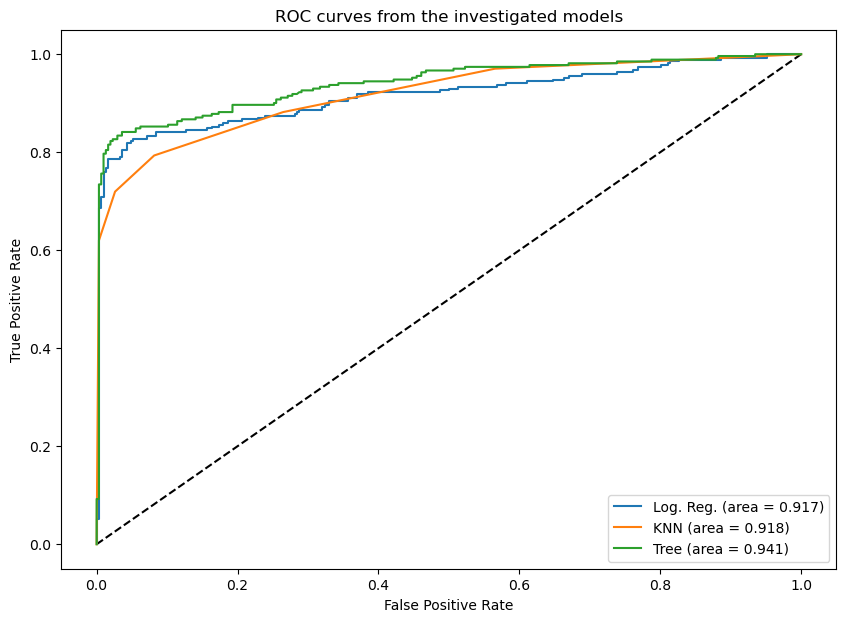

In [60]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(y_test, y_pred_prob_Tree)

# Warning: Data Leakage!



# Área abaixo da curva ROC
# É uma métrica de performance pra mensurar a habilidade de um classificador binário
# Discernir entre classes positivas e negativas
roc_auc_LR = auc(fpr_lr, tpr_lr)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
roc_auc_gbc = auc(fpr_Tree, tpr_Tree)


# Rate de falsos positivos --> eixo X 
# Rate de Verdadeiros Positivos --> eixo Y
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log. Reg. (area = %0.3f)' % roc_auc_LR)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_gbc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

# O AUC do modelo Tree-based (Gradient Boosting Classifier) possui o maior AUC, 
# logo com maior indicador de ter maior poder preditivo


Use algum dos critérios de escolha de limiar apresentado em aula para definir o limiar de classificação
para cada um desses algoritmos.

In [61]:
 # O ponto de cut-off (ou limiar) é um valor que limita um classificador binário 
 # pra determinar qual classe um exemplo pertence
 # Se P(class(x) = 1) >= α, então predizir classe 1, senão 0
 
 # geralmente é 0.5
 
 # Vamos calcular o Youden's J para cada limiar
j_scores_lr = tpr_lr - fpr_lr
j_scores_KNN = tpr_KNN - fpr_KNN
j_scores_tree = tpr_Tree - fpr_Tree


# Vamos encontrar o limiar que maximize o index de Youden
optimal_idx_lr = np.argmax(j_scores_lr)
optimal_idx_knn = np.argmax(j_scores_KNN)
optimal_idx_tree = np.argmax(j_scores_tree)

optimal_threshold_lr = thresholds_lr[optimal_idx_lr]
optimal_threshold_knn = thresholds_KNN[optimal_idx_knn]
optimal_threshold_tree = thresholds_Tree[optimal_idx_tree]
print(f"Optimal threshold for Logistic Regression: {optimal_threshold_lr:.4f} (Index: {optimal_idx_lr})")
print(f"Optimal threshold for KNN: {thresholds_KNN[optimal_idx_knn]:.4f} (Index: {optimal_idx_knn})")
print(f"Optimal threshold for Gradient Boosting Classifier: {thresholds_Tree[optimal_idx_tree]:.4f} (Index: {optimal_idx_tree})")


 

Optimal threshold for Logistic Regression: 0.5109 (Index: 18)
Optimal threshold for KNN: 0.6000 (Index: 3)
Optimal threshold for Gradient Boosting Classifier: 0.4446 (Index: 34)


Após o treinamento e a escolha de limiares adequados, você deve avaliar a qualidade preditiva
dos modelos correspondentes. Para isso, você deve usar os exemplos do conjunto de teste.
Isso permitirá que você avalie o quão efetivo foi o passo de treinamento dos modelos, ou seja,
qual o poder preditivo de cada modelo de classificação.
- Produza a matriz de confusão (confusion matrix) relativa aos resultados da fase de testes
para cada modelo.
- Apresente também o relatório produzido pela função classification_report do Scikit-
Learn.

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt


y_pred_lr = [1 if prob>=optimal_threshold_lr else 0 for prob in y_pred_prob_lr]
y_pred_knn = [1 if prob >= optimal_threshold_knn else 0 for prob in y_pred_prob_KNN]
y_pred_tree = [1 if prob >+ optimal_threshold_tree else 0 for prob in y_pred_prob_Tree]


              precision    recall  f1-score   support

           0       0.86      0.96      0.90       306
           1       0.94      0.82      0.88       271

    accuracy                           0.89       577
   macro avg       0.90      0.89      0.89       577
weighted avg       0.90      0.89      0.89       577



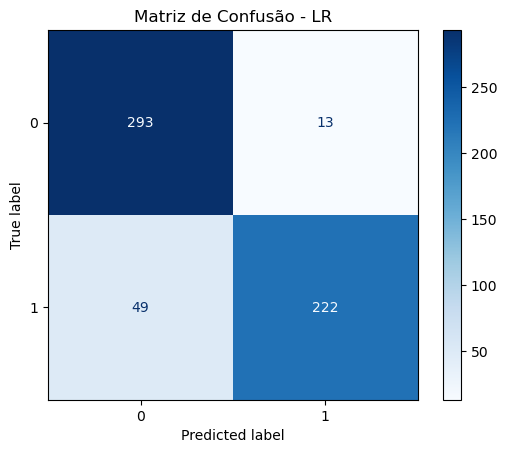

In [63]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - LR')

print(classification_report(y_test, y_pred_lr))

# precision =  TP / TP + FP  --> (quantos predizidos corretamente pra uma classe X) / (quantos ao todo tem nessa classe X)
# recall = TP / TP + FN   --> (quantos predizidos corretamente pra uma classe X) / (quantos predizidos pra uma classe X)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       306
           1       0.90      0.79      0.84       271

    accuracy                           0.86       577
   macro avg       0.86      0.86      0.86       577
weighted avg       0.86      0.86      0.86       577



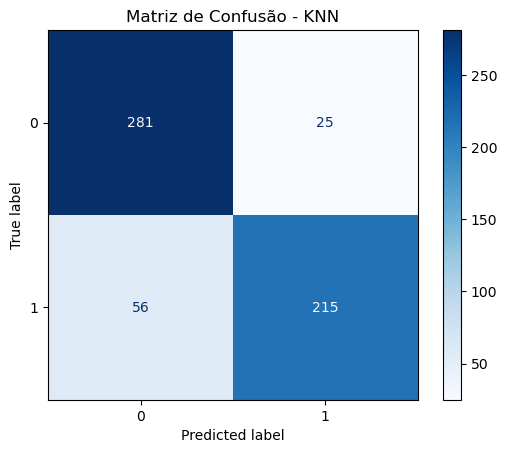

In [64]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - KNN')

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       306
           1       0.95      0.84      0.89       271

    accuracy                           0.90       577
   macro avg       0.91      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



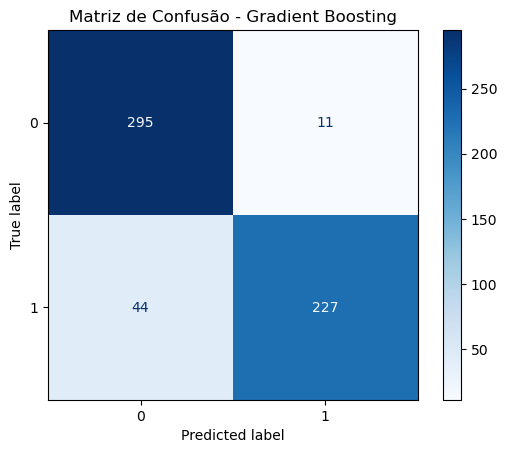

In [65]:
cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Gradient Boosting')

print(classification_report(y_test, y_pred_tree))

# (2) Predição de preços de diamantes

Nessa parte, você deve treinar um modelo de regressão sobre o conjunto de dados Diamond. Em
particular, você deve criar um modelo para predizer o valor do preço (representado na variável
dependente price) de um diamante usando os demais atributos como variáveis independentes.

Repare que o conjunto de dados Diamond também contém variáveis não-numéricas. Sendo
assim, você também precisará realizar passos de pré-processamento sobre o conjunto de dados
antes de iniciar o treinamento do modelo.

In [1]:
import pandas as pd

path = 'C:/Users/parai/Documents/Github - Aprendizado de Máquina/Machine-Learning/data/'
path_data = 'diamonds.csv'


nomes_colunas = ['carat', 'cut', 'color', 'clarity', 'depth', 'table',
                 'price', 'x', 'y', 'z']



df = pd.read_csv(f'{path}/{path_data}', names=nomes_colunas, header=0, index_col=0, delimiter=',')

y = df['price']
df = df.drop(columns=['price'])



In [2]:
from sklearn.preprocessing import OrdinalEncoder


# Lendo a documentação do Kagle:

# quality of the cut (Fair, Good, Very Good, Premium, Ideal)
# color: diamond colour, from J (worst) to D (best)
# ou seja, [J, I, H, G, F, E, D, C, B, A]
# clarity: (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) 





ordinalidade_cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
ordinalidade_color = ['J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
ordinalidade_clarity = ['I1' , 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

categorical_cols = ['cut', 'color', 'clarity']



# Cria o encoder com as categorias especificadas
ordinal_encoder = OrdinalEncoder(categories=[ordinalidade_cut, ordinalidade_color, ordinalidade_clarity])

# Aplica o fit_transform diretamente nas colunas categóricas
df_encoded = ordinal_encoder.fit_transform(df[categorical_cols])

# Adicionar ao dataframe original
df[categorical_cols] = df_encoded

print(df.head())



   carat  cut  color  clarity  depth  table     x     y     z
1   0.23  4.0    5.0      1.0   61.5   55.0  3.95  3.98  2.43
2   0.21  3.0    5.0      2.0   59.8   61.0  3.89  3.84  2.31
3   0.23  1.0    5.0      4.0   56.9   65.0  4.05  4.07  2.31
4   0.29  3.0    1.0      3.0   62.4   58.0  4.20  4.23  2.63
5   0.31  1.0    0.0      1.0   63.3   58.0  4.34  4.35  2.75


você deve previamente separar aleatoriamente 20% dos exemplos fornecidos
para formarem o conjunto de teste. Isso permitirá que você obtenha uma estimativa do
quão efetivos são os modelos gerados. Certifique-se de avaliar todos os modelos sobre o mesmo
conjunto de teste.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


# aplicar para variáveis numéricas contínuas
numerical_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']

scaler = StandardScaler()


# Aplicar o scaler e transformar para pd.DataFrame
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numerical_cols]), columns=numerical_cols, index=X_train.index) # aplicar o fit somente no dataset de train
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numerical_cols]), columns=numerical_cols, index=X_test.index)


# Remover a coluna original e concatenar no Dataframe original 
X_train = pd.concat([X_train.drop(columns=numerical_cols), X_train_scaled], axis=1)
X_test = pd.concat([X_test.drop(columns=numerical_cols), X_test_scaled], axis=1)


#Dados numéricos normalizados
print(X_train.head(10))

       cut  color  clarity     carat     depth     table         x         y  \
26547  1.0    4.0      1.0  2.560056 -2.550748  2.933861  2.229450  2.138209   
9160   2.0    5.0      1.0  0.447392 -1.220426  1.139575  0.747550  0.656710   
14132  3.0    2.0      3.0  0.637532  0.529996  0.242432  0.765404  0.700284   
15758  1.0    5.0      1.0  1.482597 -0.170173  3.382432  1.318885  1.249310   
24633  2.0    3.0      4.0  1.524851  0.249928 -0.206140  1.372448  1.380030   
49829  3.0    3.0      6.0 -0.503307 -1.430477  0.691003 -0.287995 -0.336766   
38683  4.0    4.0      6.0 -1.052599  0.109895 -1.103283 -1.261050 -1.216950   
44605  4.0    3.0      3.0 -0.566687  0.039878 -0.654711 -0.466537 -0.484916   
11460  4.0    3.0      3.0  0.743165  0.319945 -1.551854  0.899311  0.796145   
2496   4.0    5.0      6.0 -0.608940 -0.310207 -0.654711 -0.537954 -0.458771   

              z  
26547  1.738207  
9160   0.537733  
14132  0.791951  
15758  1.243894  
24633  1.399249  
49829 -0.46

1. sklearn.linear_model.LinearRegression
2. sklearn.neighbors.KNeighborsRegressor
3. sklearn.ensemble.GradientBoostingRegressor

In [5]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()

model_LR.fit(X_train, y_train)

# predizir o conjunto de teste
y_pred_lr = model_LR.predict(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier


model_KNN = KNeighborsClassifier()


model_KNN.fit(X_train, y_train)


y_pred_knn = model_KNN.predict(X_test)



In [7]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()

model_GBR.fit(X_train, y_train)


y_pred_gbr = model_GBR.predict(X_test)

Reporte o poder preditivo dos modelos que você construiu. Como métricas de avaliação,
use o RMSE e o coeficiente e determinação R2. Apresente uma análise dos resultados
obtidos.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")

# KNeighbors
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNeighbors - MSE: {mse_knn:.4f}, RMSE: {rmse_knn:.4f}, R2: {r2_knn:.4f}")

# GradientBoostingRegressor
mse_GBR = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_GBR)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"GradientBoostingRegressor - MSE: {mse_GBR:.4f}, RMSE: {rmse_gbr:.4f}, R2: {r2_gbr:.4f}")





Linear Regression - MSE: 1499636.6903, RMSE: 1224.5965, R2: 0.9057
KNeighbors - MSE: 1515373.8593, RMSE: 1231.0052, R2: 0.9047
GradientBoostingRegressor - MSE: 371026.8913, RMSE: 609.1198, R2: 0.9767


# (3) Conjuntos desbalanceados - parte I

# (4) Conjuntos desbalanceados - parte II

# (5) Calibração de modelos

# (6) Validação cruzada aninhada